In [1]:
from src.cluster.modularity_clustering import modularity_clustering
from src.Graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
import random
import src.cluster.cluster_algorithm as Ca

# Merge based on Modularity
* berechnen der Möglichen Änderungen der Modularity für jeden Cluster-merge (Δ<sub>i,j</sub>)  und normalisierte Knotengrade a<sub>i,j</sub>
* Auswählen Cluster i und Cluster j mit max<sub>i,j</sub>(Δ<sub>i,j</sub>)
* nach jedem merge: updaten der Hilfsvariablen

### Implementierung
* priority queue / min-heap (heapq modul in python)
* Elemente in PQ: \
        priority: Δ<sub>i,j</sub> und element: (i,j)  

**1. Problem: min-heap**
> -(deltas) in PQ 

**2. Problem: wie sollen Elemente in PQ geupdated werden?** \
gegeben: Cluster j wird in Cluster i gemerged
* PQ[(i,j)] = (new_delta, (i,j)) geht nicht
* Operationen: \
        extract-min O(1) (heappop), \
        insert O(log n)(heappush) und \
        delete O(n) und lookup O(n)
        
**naive Lösung**: \
        durch alle (u,v) gehen wo i ∈ {u,v} \
        löschen des alten werts \
        berechnen & insert neuen wert

**Problem**: lookup O(N²). N- mal.. brauchen eventuell auch zugehöriges Δ<sub>u,j</sub> \
        dh. das dauert im worst case O(N³) 

**Lösung**: 
* Abspeichern aller relevanten deltas in einem dictionary \
                _{ (u,v) : ( delta, PQ-Index ) | i ∈ {u,v} xor j ∈ {u,v} }_ -> O(N²)
                
* Durchlaufen des dictionaries: -> O(N)  \
Abspeichern der Indices die aus PQ gelöscht werden sollen \
Abspeichern der neuen (delta, (u,v)) tupel die in PQ eingefügt werden sollen 

* Update von PQ O( N * logN)

Insgesamt: O(N² * logN) 


In [2]:
def visualize_segmentation(file, calc_segmentation, mode, optimize):
    nxG = nx.read_gexf(file)
    nxG = nx.relabel_gexf_graph(nxG)
    G = Graph()
    for n in nxG.nodes():
        n = n.replace(" ","_")
        G.add_node(n)
    for e1, e2 in nxG.edges():
        e1 = e1.replace(" ", "_")
        e2 = e2.replace(" ", "_")
        G.add_edge(e1,e2)

    segmentation = calc_segmentation(G, mode = mode, optimize = optimize)

    colors = ["green", "yellow","red", "blue", "pink", "purple", "orange"]
    color_id = 0
    nx_index = [n for n in nxG]
    color_map = [ "black" for n in nxG]
    for segment in segmentation:
        if color_id < len(colors):
            color = colors[color_id]
        else:
            color = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
        for n in nxG:
            if n.replace(" ", "_") in segment:
                color_map[nx_index.index(n)] = color
        color_id += 1

    # 1114, 833, 1997, 764,  947, 164
    seed = random.randint(1,2000)
    print(seed)

    my_pos = nx.spring_layout(nxG, seed = 1104)
    plt.figure(figsize=(12,12))
    nx.draw(nxG, pos = my_pos, node_color= color_map,with_labels=True, node_size=500, edge_color='black', linewidths=1, font_size=8)
    plt.title((mode, optimize), fontsize=30)
    plt.show()

In [3]:
def clustering(G, mode = "cut", optimize="modularity"):
    if mode == "cut":
        if optimize == "modularity":
            cl, _ = Ca.second_heuristic(G)
        else:
            cl, _ = Ca.second_heuristic(G, version = "dis")
    if mode == "merge":
        if optimize == "modularity":
            cl = modularity_clustering(G) #meine funktion
        else:
            cl, _ = Ca.first_heuristic(G, version = "dis")
    return cl

1949


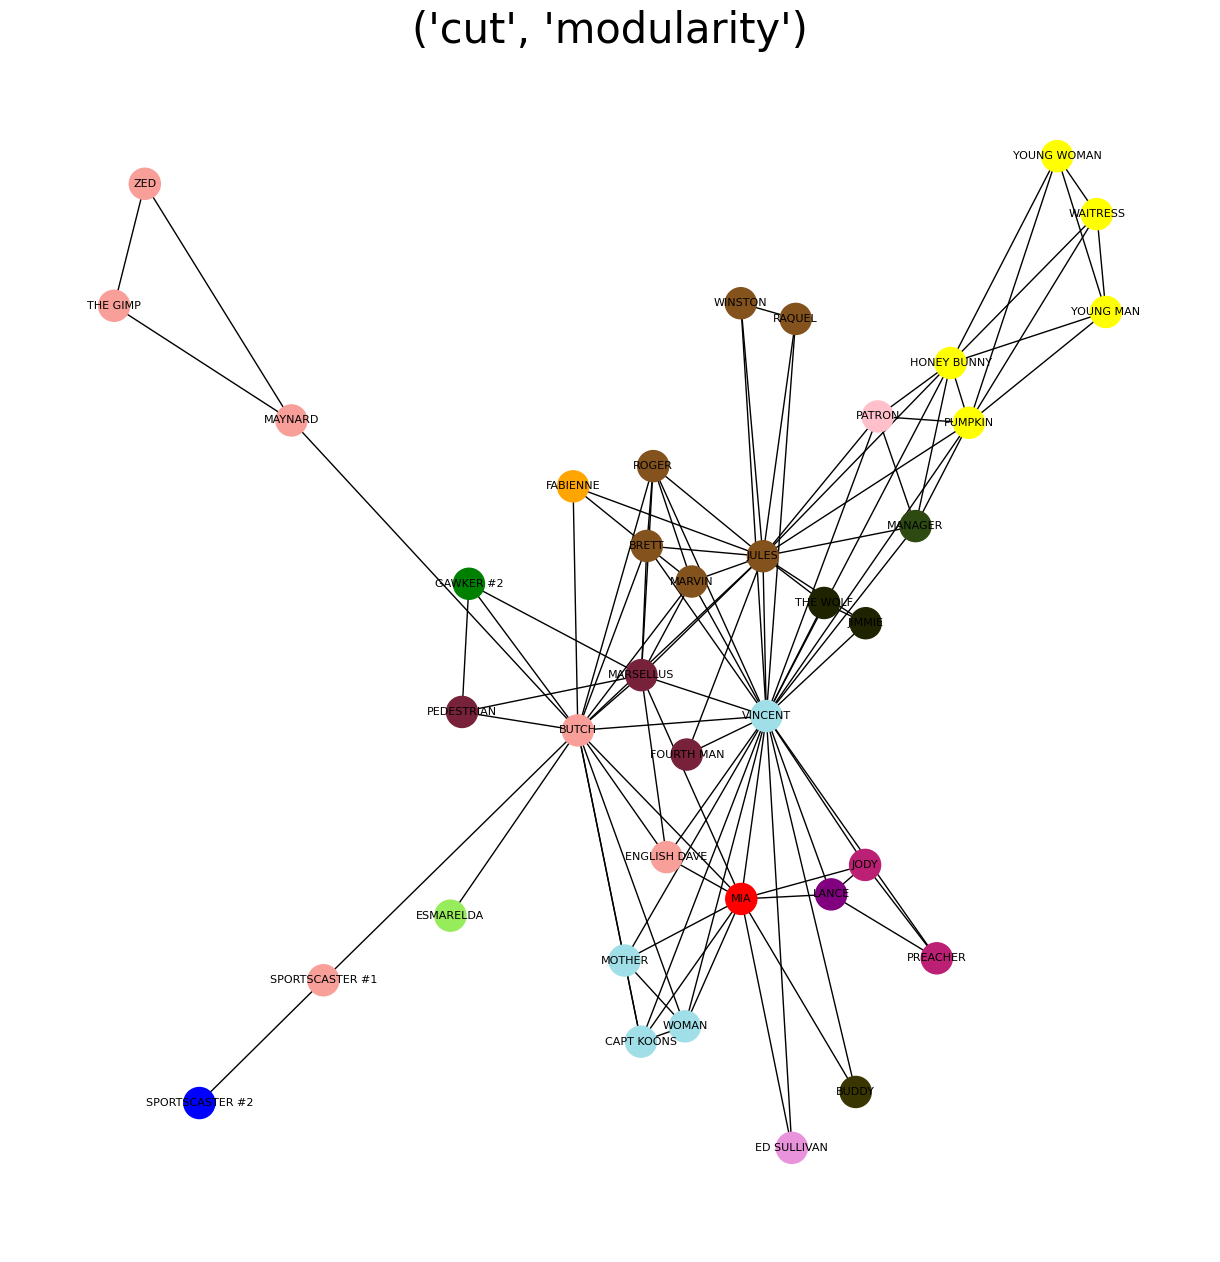

In [4]:
visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "cut", "modularity")

663


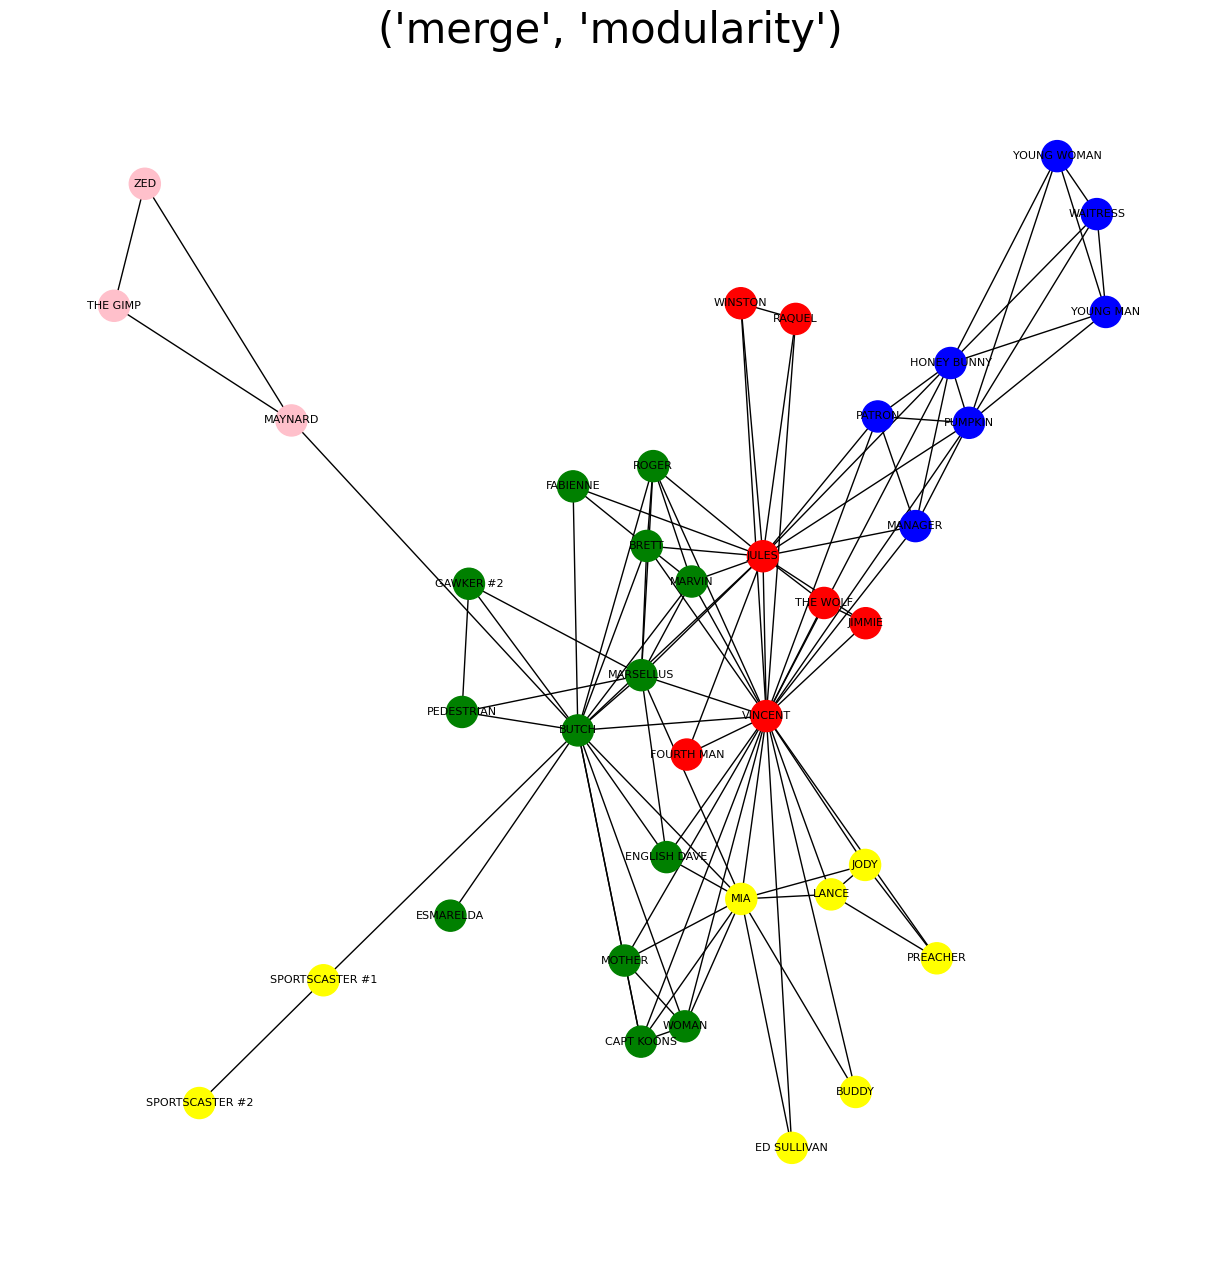

In [5]:

visualize_segmentation("networks/movies/pulpfiction.gexf", clustering, "merge", "modularity")